## What is Human Action Recognition(HAR)?

- Human activity recognition, or HAR for short, is a broad field of study concerned with identifying the specific movement or action of a person based on sensor data.
- Movements are often typical activities performed indoors, such as walking, talking, standing, and sitting

## Why it is important ?
- Human activity recognition plays a significant role in human-to-human interaction and interpersonal relations.
- Because it provides information about the identity of a person, their personality, and psychological state, it is difficult to extract.
- The human ability to recognize another person’s activities is one of the main subjects of study of the scientific areas of computer vision and machine learning. As a result of this research, many applications, including video surveillance systems, human-computer interaction, and robotics for human behavior characterization, require a multiple activity recognition system.

## Below are some practical applications of HAR:

![man boxing](./images/punching.gif)

Here we can see that the AI is able to identify what the man in the video is doing. This might raise the question of importance of identification of the action. Let's look at another example below:

![running in classroom](./images/har_run.gif)

Here we can see that the model is able to identify the troublesome student who is running in the classroom highlighted in red. Whereas the other kids who are walking normally are colored in green. 

This is a just small example of the endless applications that can help us automate monotonous and dangerous jobs.

## What is a CNN?

A convolutional neural network (CNN) is a type of artificial neural network used in image recognition and processing that is specifically designed to process pixel data.

CNNs are powerful image processing, artificial intelligence (AI) that use deep learning to perform both generative and descriptive tasks, often using machine vison that includes image and video recognition, along with recommender systems and natural language processing (NLP).

![cnn](./images/cnn.jpeg)

## VGG16

VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.

![vgg16](./images/vgg16.png)

## What is Transfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task. It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

![transfer learning](./images/transfer.jpeg)

## HAR using Transfer Learning

## Imports

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
import cv2 as cv
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_action = pd.read_csv("Human Action Recognition/Training_set.csv")
test_action = pd.read_csv("Human Action Recognition/Testing_set.csv")

In [3]:
train_action.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


## Looking at the data

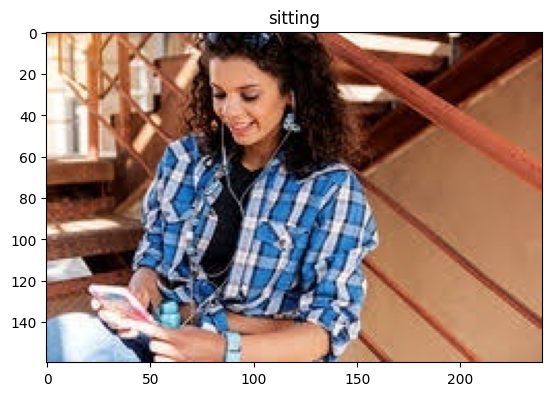

In [4]:
img = cv.imread('Human Action Recognition/train/' + train_action.filename[0])
plt.title(train_action.label[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));

In [5]:
test_action.shape

(5400, 1)

There are 12,600 images in the training dataset. Creating a function which will randomly sample a image from the set and print the image along with its labeled action.

In [6]:
def show_img_train():
    img_num = np.random.randint(0,12599)
    img = cv.imread('Human Action Recognition/train/' + train_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(train_action.label[img_num])

def show_img_test():
    img_num = np.random.randint(0,5399)
    img = cv.imread('Human Action Recognition/train/' + test_action.filename[img_num])
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

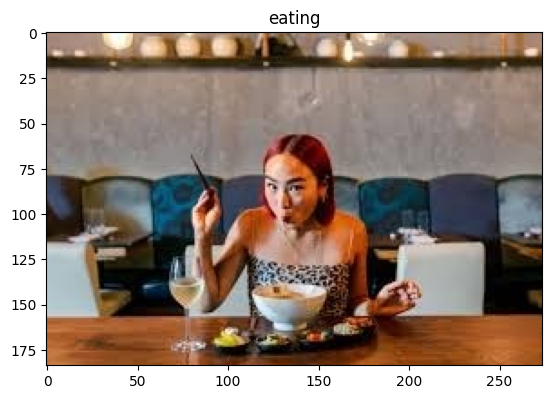

In [7]:
show_img_train()

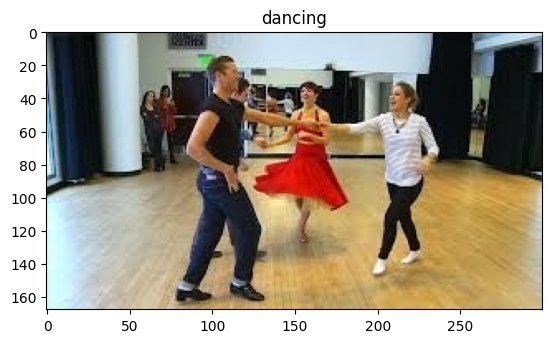

In [8]:
show_img_train()

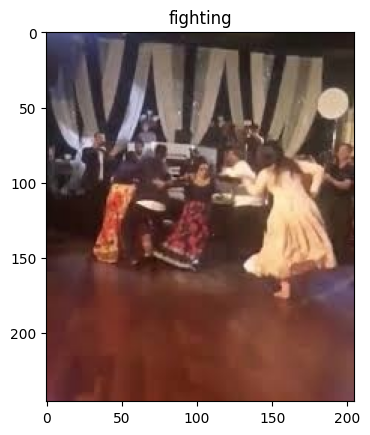

In [9]:
show_img_train()

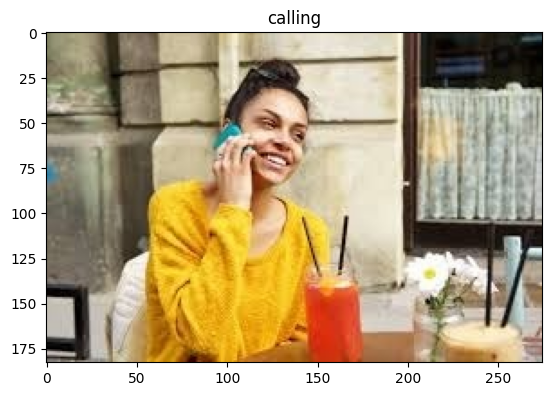

In [10]:
show_img_train()

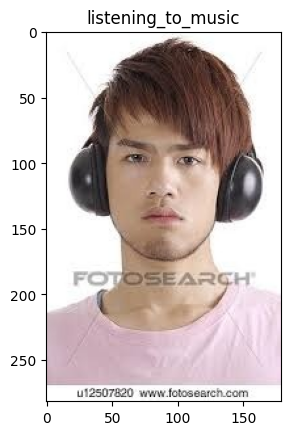

In [11]:
show_img_train()

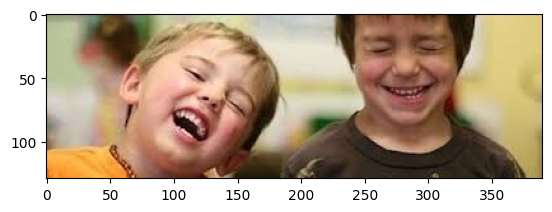

In [12]:
show_img_test()

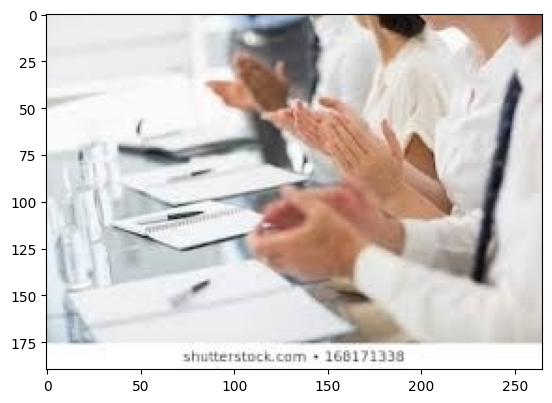

In [13]:
show_img_test()

Note that the images from the test set do not contain the labels. That is for the model to predict.

## Plotting the label classes

### Pie chart

In [14]:
pip install --upgrade nbformat


Note: you may need to restart the kernel to use updated packages.


In [15]:
import plotly.express as px

l = train_action.label.value_counts()  # Series containing counts of each category

fig = px.pie(
    values=l.values,   # Use the values from value_counts()
    names=l.index,     # Use the labels from value_counts()
    title='Distribution of Human Activity'
)

fig.show()


### Value counts

In [16]:
train_action.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

The output classes for the image classification are balanced. This reduces a step in pre-processing which deals with imbalanced classes using techniques such as SMOTE, under-sampling, etc.

## Preprocessing

(160, 240, 3)


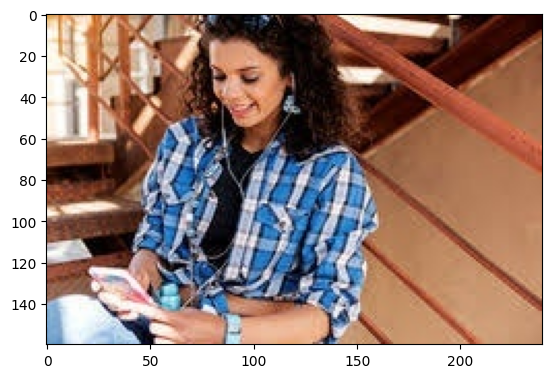

In [17]:
img = cv.imread('Human Action Recognition/train/' + train_action.filename[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));
print(img.shape)

The inputs for VGG16 model as per the Tensorflow documentation is 224x224. Here out training set images come in all different sizes. We need to resize the images.

### Create the directory for resized images 

Skipping the below cell since the folder has already been created.

In [18]:
parent_dir = os.getcwd()
directory = 'resized-train'
path = os.path.join(parent_dir, directory)
os.mkdir(path)
print('Created "resized-train" folder')

FileExistsError: [Errno 17] File exists: '/Users/a.leelakrishnareddy/Desktop/Computer_Vision/resized-train'

## Resize the training images

In [ ]:
import os
import cv2 as cv
import numpy as np

width, height = 224, 224
dim = (width, height)


train_dir = 'Human Action Recognition/train/'  
resized_dir = 'resized-train/'  

os.makedirs(resized_dir, exist_ok=True)
print(f'Created/Found "{resized_dir}" folder')

image_files = [f for f in os.listdir(train_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for filename in image_files:
    img_path = os.path.join(train_dir, filename)
    img = cv.imread(img_path)  

    if img is None:
        print(f"Skipping: {filename} (Cannot read image)")
        continue  


    resized_img = cv.resize(img, dim, interpolation=cv.INTER_AREA)


    save_path = os.path.join(resized_dir, filename)
    cv.imwrite(save_path, resized_img)

print(f'Resized {len(image_files)} images and saved to "{resized_dir}"')


Created/Found "resized-train/" folder
Resized 12601 images and saved to "resized-train/"


## Resize the test set images

In [ ]:
import os
import cv2 as cv
import numpy as np


width, height = 224, 224
dim = (width, height)


test_dir = 'Human Action Recognition/test/'  
resized_test_dir = 'resized-test/'  


os.makedirs(resized_test_dir, exist_ok=True)
print(f'Created/Found "{resized_test_dir}" folder')


image_files = [f for f in os.listdir(test_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


for filename in image_files:
    img_path = os.path.join(test_dir, filename)
    img = cv.imread(img_path)  # Read image

    if img is None:
        print(f"Skipping: {filename} (Cannot read image)")
        continue  # Skip unreadable files

    resized_img = cv.resize(img, dim, interpolation=cv.INTER_AREA)

    save_path = os.path.join(resized_test_dir, filename)
    cv.imwrite(save_path, resized_img)

print(f'Resized {len(image_files)} test images and saved to "{resized_test_dir}"')


Created/Found "resized-test/" folder
Resized 5410 test images and saved to "resized-test/"


## Pre-processing

### Display image

(224, 224, 3)


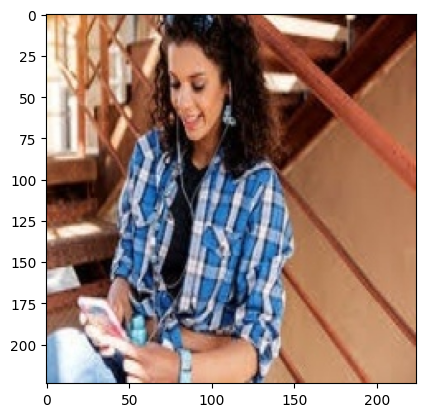

In [18]:
img = cv.imread('resized-train/' + train_action.filename[0])
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
print(img.shape)

We can see that the images have been resized and stored in a different directory. This helps us avoid resizing the images everytime we run the notebook.

## Read images and convert them into numpy arrays

## X

In [19]:
#empty list train
X = []

#reading all the resized images
for i in np.arange(len(train_action.filename)): 
    img = cv.imread('resized-train/' + train_action.filename[i])
    X.append(img)

X = np.asarray(X)
X.shape

(12600, 224, 224, 3)

## y

In [20]:
y = np.asarray(pd.get_dummies(train_action.label))
print(y.shape)

(12600, 15)


## Test train Split

In [21]:
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42,stratify=train_action.label)

(12600, 224, 224, 3) (12600, 15)


In [22]:
print(X_train.shape,y_train.shape)

(11340, 224, 224, 3) (11340, 15)


## Unseen test set

This set of images are meant to be submitted on Kaggle. We wont be using this data for this project.

In [ ]:
X_unseen = []
for i in np.arange(len(test_action.filename)): 
    img = cv.imread('resized-test/' + test_action.filename[i])
    X_unseen.append(img)

X_unseen = np.asarray(X_unseen)
X_unseen.shape

(5400, 224, 224, 3)

## Building the CNN model using transfer learning

### Initializing a VGG16 model

In [ ]:
cnn_model = Sequential()
pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=15,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
cnn_model.add(pretrained_model)
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(15, activation='softmax'))

2025-03-10 21:57:16.874890: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-10 21:57:16.875646: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-10 21:57:16.876099: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-03-10 21:57:16.876391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-10 21:57:16.876792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow as tf
cnn_model = Sequential()
pretrained_model = ResNet50(include_top=False,
                             input_shape=(224,224,3),
                             pooling='avg',
                             weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False
cnn_model.add(pretrained_model)
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(15, activation='softmax'))


2025-03-18 17:51:53.142427: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-18 17:51:53.142777: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-03-18 17:51:53.142971: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-03-18 17:51:53.143518: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-18 17:51:53.143826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


## Model Summary

- The loss function that we are trying to minimize is Categorical Cross Entropy. This metric is used in multiclass classification. This is used alongside softmax activation function.
 
- Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data. This algorithm is straight forward to implement and computationally efficient.

In [25]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         7,695 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,644,495 (94.01 MB)

 Trainable params: 1,056,783 (4.03 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## Training the model

In [26]:
history = cnn_model.fit(X_train,y_train, epochs=60)

Epoch 1/60


2025-03-18 17:52:26.897969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


355/355 ━━━━━━━━━━━━━━━━━━━━ 134s 362ms/step - accuracy: 0.4779 - loss: 2.4271
Epoch 2/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 126s 356ms/step - accuracy: 0.6114 - loss: 1.3285
Epoch 3/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 126s 355ms/step - accuracy: 0.6331 - loss: 1.2343
Epoch 4/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 125s 352ms/step - accuracy: 0.6572 - loss: 1.1890
Epoch 5/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 125s 351ms/step - accuracy: 0.6640 - loss: 1.1880
Epoch 6/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 126s 355ms/step - accuracy: 0.6816 - loss: 1.1125
Epoch 7/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 125s 353ms/step - accuracy: 0.6939 - loss: 1.0669
Epoch 8/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 126s 355ms/step - accuracy: 0.7139 - loss: 1.0419
Epoch 9/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 126s 354ms/step - accuracy: 0.7298 - loss: 0.9584
Epoch 10/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 127s 358ms/step - accuracy: 0.7321 - loss: 0.9484
Epoch 11/60
355/355 ━━━━━━━━━━━━━━━━━━━━ 127s 359ms/step - accuracy: 0.7415 - loss: 0.9467
Epoch 12/60
355/355

## Save the model weights

In [ ]:
cnn_model.save('cnn_model.keras')


In [35]:
cnn_model = tf.keras.models.load_model('cnn_model.keras')


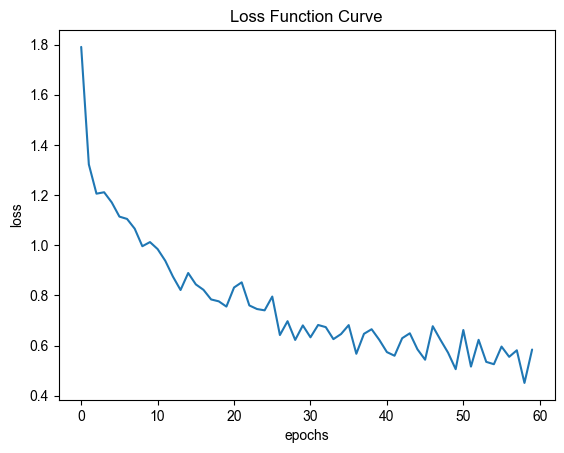

In [ ]:
loss = history.history['loss']
plt.title("Loss Function Curve")
plt.ylabel("loss")
plt.xlabel("epochs")
sns.set_theme(style='darkgrid')
sns.lineplot(loss);

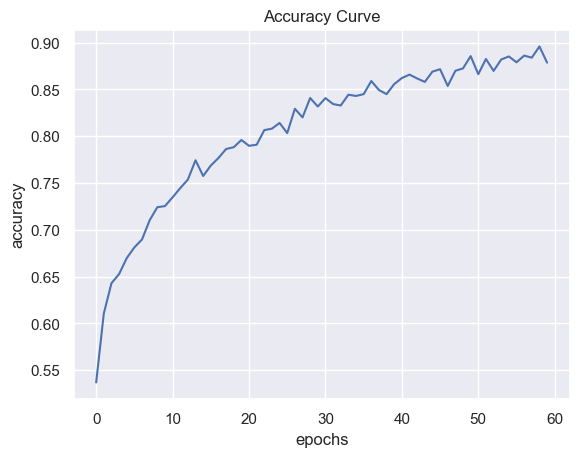

In [29]:
plt.title("Accuracy Curve")
plt.ylabel("accuracy")
plt.xlabel("epochs")
accu = history.history['accuracy']
sns.lineplot(accu);

## Predictions

In [36]:
y_preds = cnn_model.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 406ms/step


## Accuracy and Log Loss

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
y_pred_labels = np.argmax(y_preds, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
print('Log Loss:', log_loss(y_test, y_preds))  
print('Accuracy:', accuracy_score(y_test_labels, y_pred_labels))


Log Loss: 3.5513416170861296
Accuracy: 0.6563492063492063


## Visualizing the predictions

In [ ]:
from PIL import Image
import matplotlib.image as mimg


def read_image(fn):
    image = Image.open(fn)
    return np.asarray(image.resize((224,224)))


def test_predict(test_image):
    result = cnn_model.predict(np.asarray([read_image(test_image)]))

    itemindex = np.where(result==np.max(result))
    prediction = itemindex[1][0]
    print("probability: "+str(np.max(result)*100) + "%\nPredicted class : ", prediction)

    image = mimg.imread(test_image)
    plt.imshow(image)
    plt.title(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
probability: 100.0%
Predicted class :  12


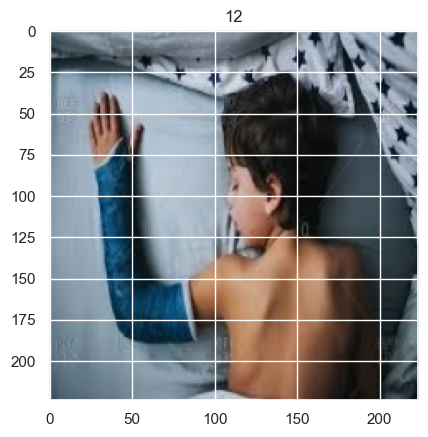

In [ ]:
filename = test_action.filename.iloc[0]
test_predict('./resized-test/' + filename)

In [45]:
#Image 2
filename = test_action.filename.iloc[0]
test_predict('./resized-test/' + filename)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Predicted Class: 0, Confidence: 99.90%


In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import os
def test_predict(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255.0  
    img = np.expand_dims(img, axis=0)  
    preds = cnn_model.predict(img)
    predicted_class = np.argmax(preds, axis=1)[0]
    confidence = np.max(preds) * 100  
    print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}%")
test_folder = "./resized-test/"
test_images = os.listdir(test_folder)
for filename in test_images:
    print(f"\nTesting image: {filename}")
    test_predict(os.path.join(test_folder, filename))


Testing image: Image_1502.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Class: 0, Confidence: 99.90%

Testing image: Image_811.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Class: 0, Confidence: 99.98%

Testing image: Image_3315.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: 0, Confidence: 99.04%

Testing image: Image_3473.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted Class: 0, Confidence: 99.98%

Testing image: Image_5002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted Class: 0, Confidence: 99.86%

Testing image: Image_1264.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Class: 0, Confidence: 99.71%

Testing image: Image_1270.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: 0, Confidence: 99.72%

Testing image: Image_3467.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Class: 0, Confidence: 99.94%

Testing image: Image_4308.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Class: 0, Confidence: 98.89%

Testing image: Image_5016.jpg


KeyboardInterrupt: 

## Next Steps and Recommendations


- In order to improve the accuracy, we can unfreeze few more layers and retrain the model. This will help us further improve the model.

- We can tune the parameters using KerasTuner.

- The model reached a good accuracy score after the 20 epochs but it has been trained for 60 epochs. There is definitely some overfitting which can avoided with early stopping.

- The nodes in the deep layers were connected. We can introduce some amount dropout for regularization.